In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import tensorflow as tf
import os
from configparser import ConfigParser
import matplotlib.pyplot as plt
from visualize_graph import visual_graph, visualize_raw_weights

d:\program\anaconda\envs\tensorflow\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
feature_cubes_pointer = np.load('../data/processed_data/feature_cubes.npz')
feature_cubes = feature_cubes_pointer['feature_cubes']
std_arr_pointer = np.load('../data/processed_data/standardize_arr.npz')
feature_mean = std_arr_pointer['feature_mean']
feature_std = std_arr_pointer['feature_std']
feature_cubes_feed = (feature_cubes - feature_mean)/feature_std
print(feature_cubes.shape)

(157991, 20, 20, 4)


In [79]:
sample_feature_cubes = []
a = np.where(feature_cubes_feed[:, :, :, 0] == 1)
j = 0
for i in (np.unique(a[0])[3800:]):
    if np.sum(feature_cubes_feed[i, :, :, 0]) >= 60:
        j += 1
        sample_feature_cubes.append(feature_cubes_feed[i])
        if j > 31:
            break
sample_feature_cubes = np.array(sample_feature_cubes).reshape(32, 1, 20, 20, 4)
print(sample_feature_cubes.shape)

(32, 1, 20, 20, 4)


In [80]:
# idx = np.random.randint(157991*7.5//12, 157991*8.5//12, size = 32)
# sample_feature_cubes = feature_cubes_feed[idx, None, :, :, :]
# print(sample_feature_cubes.shape)

In [81]:
tf.reset_default_graph()
restored_model_path = 'visual_network/model.ckpt-99'
config_path = 'configs/encoder_decoder_nn.ini'
visual_graph_class = visual_graph(config_path, restored_model_path)
conv1_out, conv2_out, conv3_out = visual_graph_class.feed_fwd_convlayer(feed_input=sample_feature_cubes)
weights = visual_graph_class.weights

conv 1 layer shape:  (?, 8, 8, 16)
conv 2 layer shape:  (?, 6, 6, 16)
conv 3 layer shape:  (?, 4, 4, 32)
dense shape (reshape from conv3):  (?, ?)
fully connected layer shape:  (?, 32)
INFO:tensorflow:Restoring parameters from visual_network/model.ckpt-99


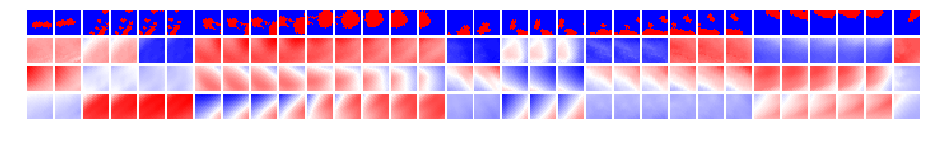

In [82]:
# n_layers = weight_var.shape[3]
# n_channels = weight_var.shape[2]
plot_feature_cubes = sample_feature_cubes * feature_std + feature_mean
fig, axs = plt.subplots(4, 32, figsize=(16,2), facecolor='w', edgecolor='k')
fig.subplots_adjust(wspace = 0.1, hspace = 0.1)
axs = axs.ravel()
for i in range(4):
    for j in range(32):
        axs[32 * i + j].imshow(plot_feature_cubes[j, 0, :, :, i], 
                               cmap = 'bwr',
                               vmax = plot_feature_cubes[:, :, :, :, i].max(), 
                               vmin = plot_feature_cubes[:, :, :, :, i].min(),
                               origin = 'lower')
        axs[32 * i + j].set_axis_off()
plt.show()

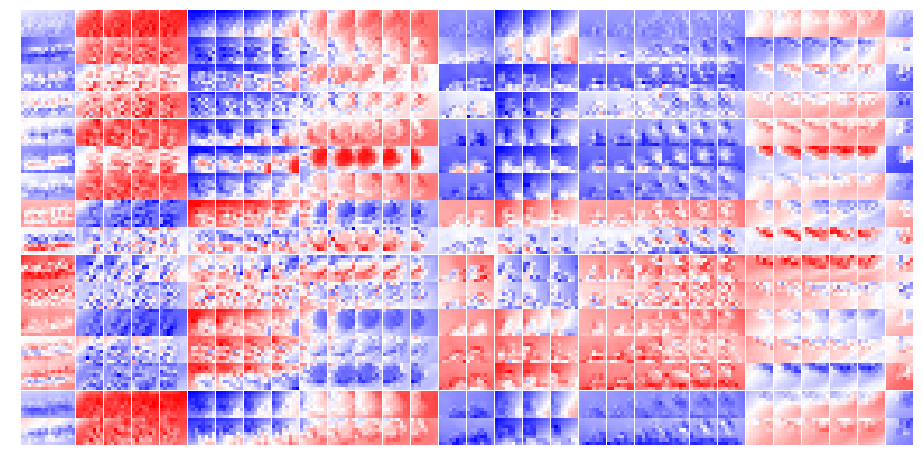

In [83]:
# n_layers = weight_var.shape[3]
# n_channels = weight_var.shape[2]
fig, axs = plt.subplots(16, 32, figsize=(16,8), facecolor='w', edgecolor='k')
fig.subplots_adjust(wspace = 0.01, hspace = 0.01)
axs = axs.ravel()
for i in range(16):
    for j in range(32):
        axs[32 * i + j].imshow(conv1_out[j, :, :, i], 
                               cmap = 'bwr',
                               vmax = conv1_out[:, :, :, i].max(), 
                               vmin = conv1_out[:, :, :, i].min(),
                               origin = 'lower')
        axs[32 * i + j].set_axis_off()
plt.show()

In [84]:
conv2_out.shape

(32, 6, 6, 16)

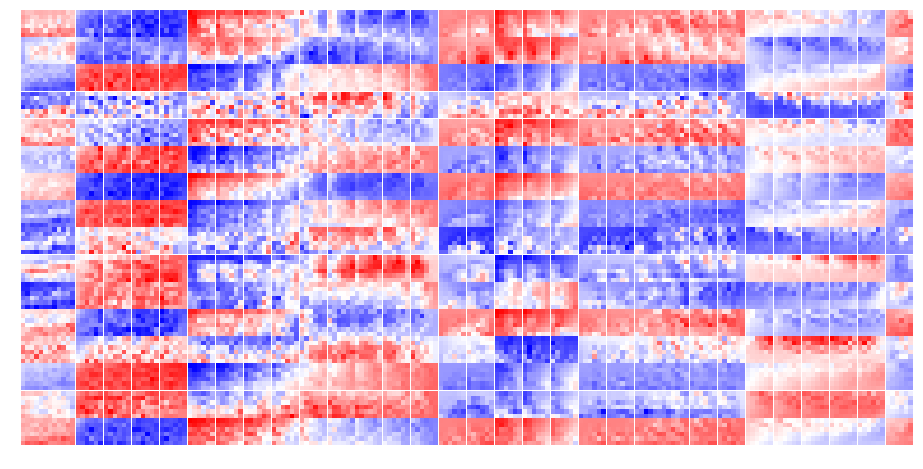

In [85]:
# n_layers = weight_var.shape[3]
# n_channels = weight_var.shape[2]
fig, axs = plt.subplots(16, 32, figsize=(16,8), facecolor='w', edgecolor='k')
fig.subplots_adjust(wspace = 0.01, hspace = 0.01)
axs = axs.ravel()
for i in range(16):
    for j in range(32):
        axs[32 * i + j].imshow(conv2_out[j, :, :, i], 
                               cmap = 'bwr',
                               vmax = conv2_out[:, :, :, i].max(), 
                               vmin = conv2_out[:, :, :, i].min(),
                               origin = 'lower')
        axs[32 * i + j].set_axis_off()
plt.show()

In [86]:
conv3_out.shape

(32, 4, 4, 32)

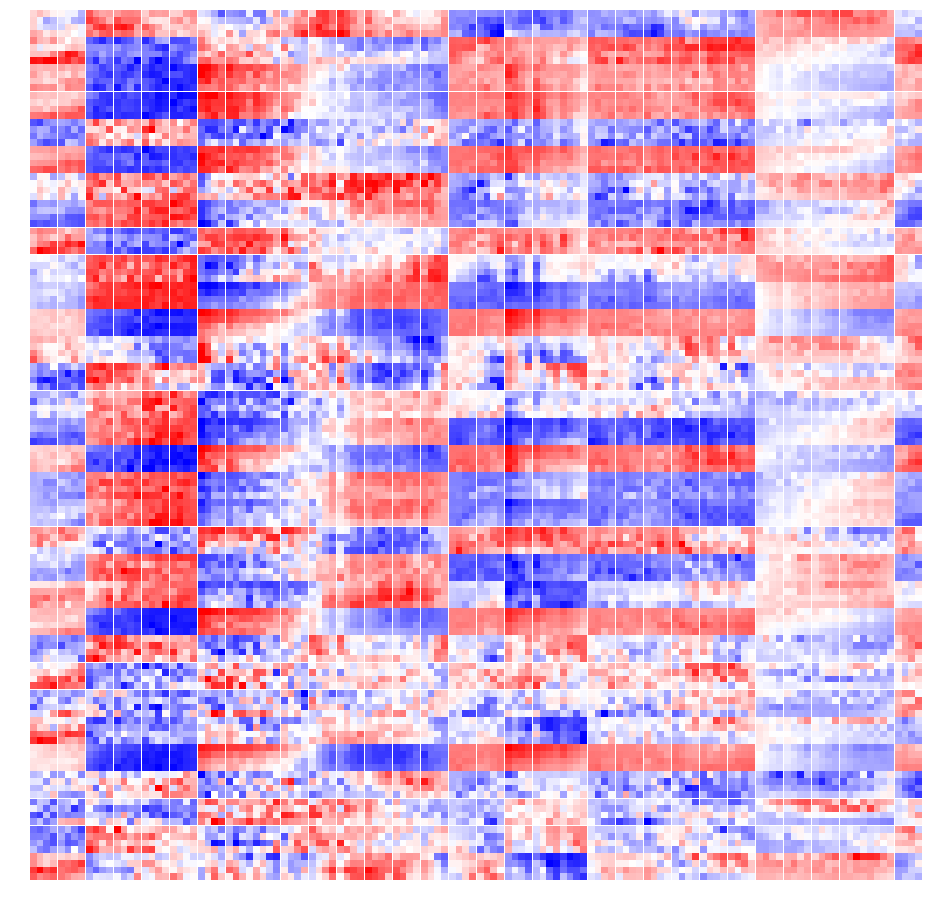

In [87]:
# n_layers = weight_var.shape[3]
# n_channels = weight_var.shape[2]
fig, axs = plt.subplots(32, 32, figsize=(16,16), facecolor='w', edgecolor='k')
fig.subplots_adjust(wspace = 0.01, hspace = 0.01)
axs = axs.ravel()
for i in range(32):
    for j in range(32):
        axs[32 * i + j].imshow(conv3_out[j, :, :, i], 
                               cmap = 'bwr',
                               vmax = conv3_out[:, :, :, i].max(), 
                               vmin = conv3_out[:, :, :, i].min(),
                               origin = 'lower')
        axs[32 * i + j].set_axis_off()
plt.show()

In [13]:
for key in weights.keys():
    print(key, weights[key].shape)

b1:0 (32,)
h1:0 (2, 32)
encoder/rnn/multi_rnn_cell/cell_0/basic_lstm_cell/kernel:0 (160, 512)
encoder/rnn/multi_rnn_cell/cell_0/basic_lstm_cell/bias:0 (512,)
encoder/rnn/multi_rnn_cell/cell_1/basic_lstm_cell/kernel:0 (256, 512)
encoder/rnn/multi_rnn_cell/cell_1/basic_lstm_cell/bias:0 (512,)
wc1:0 (6, 6, 4, 16)
wc2:0 (3, 3, 16, 16)
wc3:0 (3, 3, 16, 32)
wcd:0 (512, 32)
bc1:0 (16,)
bc2:0 (16,)
bc3:0 (32,)
bcd:0 (32,)
b2:0 (64,)
h2:0 (38, 64)
decoder/rnn/multi_rnn_cell/cell_0/basic_lstm_cell/kernel:0 (192, 512)
decoder/rnn/multi_rnn_cell/cell_0/basic_lstm_cell/bias:0 (512,)
decoder/rnn/multi_rnn_cell/cell_1/basic_lstm_cell/kernel:0 (256, 512)
decoder/rnn/multi_rnn_cell/cell_1/basic_lstm_cell/bias:0 (512,)
b_out:0 (84,)
h_out:0 (128, 84)


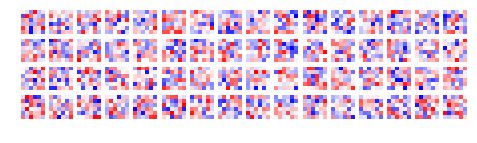

In [44]:
visualize_raw_weights(weight_var=weights['wc1:0'], fig_size = (8, 2))

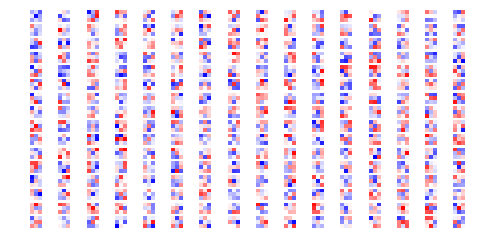

In [45]:
visualize_raw_weights(weight_var=weights['wc2:0'], fig_size = (8,4))

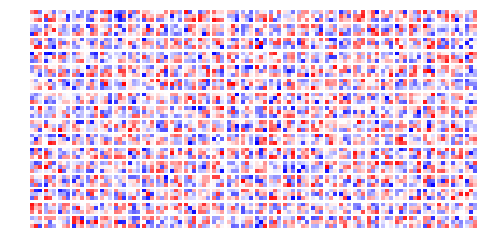

In [46]:
visualize_raw_weights(weight_var=weights['wc3:0'], fig_size = (8,4))